In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import matching_catalog

import matplotlib.pyplot as plt
import degrade_photometry
from astropy.table import Table
import numpy as np
sys.path.append('../target_selection/')
import lbg

In [2]:
data_path = '/global/cfs/cdirs/desi/users/cpayerne/data_WP221_Target_selection/'
cosmos_clauds_hsc = Table.read(data_path + 'COSMOS_11bands-SExtractor-Lephare.fits')

In [3]:
print(cosmos_clauds_hsc.colnames)

['ID', 'RA', 'DEC', 'TRACT', 'PATCH', 'MASK', 'FLAG_FIELD', 'A_WORLD', 'B_WORLD', 'KRON_RADIUS', 'THETA_WORLD', 'ELONGATION', 'ELLIPTICITY', 'EB_V', 'FWHM_WORLD_HSC_I', 'MU_MAX_HSC_I', 'CLASS_STAR_HSC_I', 'FLUX_RADIUS_0.25_HSC_I', 'FLUX_RADIUS_0.5_HSC_I', 'FLUX_RADIUS_0.75_HSC_I', 'FUV', 'NUV', 'u', 'uS', 'g', 'r', 'i', 'z', 'y', 'Yv', 'J', 'H', 'Ks', 'FUV_err', 'NUV_err', 'u_err', 'uS_err', 'g_err', 'r_err', 'i_err', 'z_err', 'y_err', 'Yv_err', 'J_err', 'H_err', 'Ks_err', 'MAG_APER_2s_u', 'MAG_APER_2s_uS', 'MAG_APER_2s_g', 'MAG_APER_2s_r', 'MAG_APER_2s_i', 'MAG_APER_2s_z', 'MAG_APER_2s_y', 'MAG_APER_2s_Yv', 'MAG_APER_2s_J', 'MAG_APER_2s_H', 'MAG_APER_2s_Ks', 'MAGERR_APER_2s_u', 'MAGERR_APER_2s_uS', 'MAGERR_APER_2s_g', 'MAGERR_APER_2s_r', 'MAGERR_APER_2s_i', 'MAGERR_APER_2s_z', 'MAGERR_APER_2s_y', 'MAGERR_APER_2s_Yv', 'MAGERR_APER_2s_J', 'MAGERR_APER_2s_H', 'MAGERR_APER_2s_Ks', 'MAG_APER_3s_u', 'MAG_APER_3s_uS', 'MAG_APER_3s_g', 'MAG_APER_3s_r', 'MAG_APER_3s_i', 'MAG_APER_3s_z', 'MAG_A

In [4]:
mag_depth = [27,27,26.7,26.5,26]
mag_depth_unions = [24.6,25.5,25.1,24.2,24.4]
catalog = degrade_photometry.degrade(cosmos_clauds_hsc, ['u','g','r','i','z'], mag_depth, mag_depth_unions, 'to_unions')

/global/u2/c/cpayerne/WP221_Target_selection/notebooks/../degrade_photometry.py:9: RuntimeWarning: invalid value encountered in log10
  return 22.5 - 2.5 * np.log10(fluxs)


In [5]:
conv = dict()
conv['u'] = 'u'
conv['g'] = 'g'
conv['r'] = 'r'
conv['i'] = 'i'
conv['z'] = 'z'
conv['u_err'] = 'u_err'
conv['g_err'] = 'g_err'
conv['r_err'] = 'r_err'
conv['i_err'] = 'i_err'
conv['z_err'] = 'z_err'

In [6]:
conv_unions = dict()
conv_unions['u'] = 'u_to_unions'
conv_unions['g'] = 'g_to_unions'
conv_unions['r'] = 'r_to_unions'
conv_unions['i'] = 'i_to_unions'
conv_unions['z'] = 'z_to_unions'
conv_unions['u_err'] = 'u_to_unions_err'
conv_unions['g_err'] = 'g_to_unions_err'
conv_unions['r_err'] = 'r_to_unions_err'
conv_unions['i_err'] = 'i_to_unions_err'
conv_unions['z_err'] = 'z_to_unions_err'

(-10.0, 10.0)

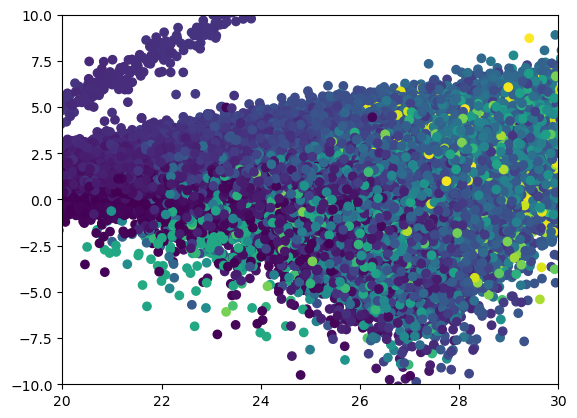

In [7]:
mask_z_ok = cosmos_clauds_hsc['ZPHOT'] > 0
plt.scatter(cosmos_clauds_hsc['r'][mask_z_ok], 
            cosmos_clauds_hsc['r'][mask_z_ok] - cosmos_clauds_hsc['Ks'][mask_z_ok], 
            c=cosmos_clauds_hsc['ZPHOT'][mask_z_ok])
plt.xlim(20, 30)
plt.ylim(-10,10)

(array([1.000000e+00, 1.000000e+00, 0.000000e+00, 7.000000e+00,
        1.300000e+01, 5.500000e+01, 3.229000e+03, 7.010000e+03,
        1.336200e+04, 2.267700e+04, 4.552300e+04, 9.659000e+04,
        2.217130e+05, 5.158250e+05, 9.691190e+05, 1.327572e+06,
        1.164626e+06, 4.548410e+05, 1.000550e+05, 2.757900e+04,
        1.107400e+04, 6.005000e+03, 4.390000e+03, 4.235000e+03,
        4.519000e+03, 4.999000e+03, 5.569000e+03, 5.709000e+03,
        4.799000e+03]),
 array([10.        , 11.03448276, 12.06896552, 13.10344828, 14.13793103,
        15.17241379, 16.20689655, 17.24137931, 18.27586207, 19.31034483,
        20.34482759, 21.37931034, 22.4137931 , 23.44827586, 24.48275862,
        25.51724138, 26.55172414, 27.5862069 , 28.62068966, 29.65517241,
        30.68965517, 31.72413793, 32.75862069, 33.79310345, 34.82758621,
        35.86206897, 36.89655172, 37.93103448, 38.96551724, 40.        ]),
 <BarContainer object of 29 artists>)

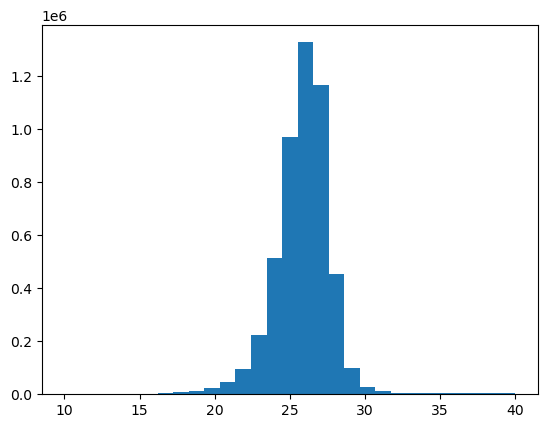

In [7]:

plt.hist(catalog['r'], bins=np.linspace(10, 40, 30))

In [67]:
mask_udrop = lbg.LBG_SELECTION(catalog, conv, name='COSMOS_BXU_U_no_magr_cut') * lbg.refined_selection_fct(catalog, conv)
mask_gdrop = lbg.LBG_SELECTION(catalog, conv, name='COSMOS_G') * lbg.refined_selection_fct(catalog, conv)

In [52]:
mask_udrop_unions = lbg.LBG_SELECTION(catalog, conv_unions, name='COSMOS_BXU_U_no_magr_cut') * lbg.refined_selection_fct(catalog, conv_unions)

In [81]:
mask_udrop_unions = lbg.LBG_SELECTION(catalog, conv_unions, name='COSMOS_BXU_U_no_magr_cut') * lbg.refined_selection_fct(catalog, conv_unions)
mask_gdrop_unions = lbg.LBG_SELECTION(catalog, conv_unions, name='COSMOS_G') * lbg.refined_selection_fct(catalog, conv_unions)

In [100]:
c1 = degrade_photometry.Probability_detect_minput(catalog['r'], 25.1, Nsigma=3)
rand = np.random.random(len(c1))
mask_sel_detect = rand < c1

(array([9.90e+01, 1.24e+03, 5.71e+02, 1.72e+02, 1.28e+02, 9.80e+01,
        5.40e+01, 3.40e+01, 3.00e+01, 1.50e+01, 7.00e+00, 4.00e+00,
        1.00e+00, 5.90e+01, 1.00e+01, 8.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00]),
 array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
        1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
        2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
        3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ]),
 [<matplotlib.patches.Polygon at 0x7f7ad71b12a0>])

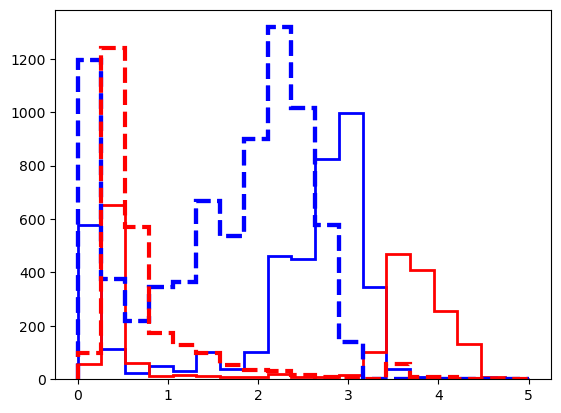

In [109]:
bins=np.linspace(0, 5, 20)
rmax = 24.5
rmin = 23.75
plt.hist(catalog['ZPHOT'][mask_udrop * (catalog['r'] < rmax)*(catalog['r'] > rmin)], bins=bins, histtype='step', linewidth=2, color = 'b')
plt.hist(catalog['ZPHOT'][mask_gdrop], bins=bins, histtype='step', lw=3, linewidth=2, linestyle='-', color = 'r')
#
plt.hist(catalog['ZPHOT'][mask_sel_detect * mask_udrop_unions * (catalog['r_to_unions'] < rmax)*(catalog['r_to_unions'] > rmin)], 
         bins=bins, histtype='step', linestyle='--',linewidth=3, color='b')
plt.hist(catalog['ZPHOT'][mask_udrop_unions * (catalog['r_to_unions'] < rmax)*(catalog['r_to_unions'] > rmin)], 
         bins=bins, histtype='step', linestyle='--',linewidth=3, color='b')
plt.hist(catalog['ZPHOT'][mask_sel_detect * mask_gdrop_unions], 
         bins=bins, histtype='step', linewidth=3, linestyle='--', color='r')
#plt.show()
#plt.yscale('log')